In [18]:
import numpy as np
import pandas as pd
import seaborn as sns


In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")

In [5]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [6]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(393, 6)

In [10]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [16]:
df.isna().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [11]:
df.skew()

C:\Users\User\AppData\Local\Temp/ipykernel_2636/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


yrs.since.phd    0.295915
yrs.service      0.638491
salary           0.698471
dtype: float64

In [24]:
from sklearn .preprocessing import LabelEncoder


In [187]:
x_train.shape

(     rank  discipline  yrs.since.phd  yrs.service  sex
 32      2           1             13            9    1
 264     2           0             37           35    1
 57      0           1              9            8    1
 99      2           1             41           26    1
 366     2           0             15           10    1
 ..    ...         ...            ...          ...  ...
 154     1           1              4            0    1
 279     2           0             46           46    1
 291     2           0             32           28    1
 181     2           1             18            5    1
 378     2           0             38           38    1
 
 [280 rows x 5 columns],
 (280,))

In [208]:
y_train.shape

(280,)

In [209]:
lab_enc=LabelEncoder()
df["discipline"]=lab_enc.fit_transform(df['discipline'])
df["discipline"]

0      1
1      1
2      1
3      1
4      1
      ..
392    0
393    0
394    0
395    0
396    0
Name: discipline, Length: 393, dtype: int64

In [210]:
lab_enc=LabelEncoder()
df["sex"]=lab_enc.fit_transform(df['sex'])
df["sex"]

0      1
1      1
2      1
3      1
4      1
      ..
392    1
393    1
394    1
395    1
396    1
Name: sex, Length: 393, dtype: int64

In [211]:
lab_enc=LabelEncoder()
df["rank"]=lab_enc.fit_transform(df['rank'])
df["rank"]

0      2
1      2
2      1
3      2
4      2
      ..
392    2
393    2
394    2
395    2
396    1
Name: rank, Length: 393, dtype: int64

In [212]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore (df))
threshold=3
np.where(z>3)

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
        103, 114, 119, 123, 127, 131, 132, 133, 148, 152, 177, 184, 214,
        226, 227, 229, 233, 241, 249, 250, 270, 312, 319, 326, 328, 330,
        337, 354, 357, 360], dtype=int64),
 array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
       dtype=int64))

In [213]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


In [214]:
df_new_z.shape

(350, 6)

In [215]:
df_new_z.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,350.000000,350.000000,350.000000,350.000000,350.0,350.000000
mean,1.542857,0.540000,22.897143,18.082857,1.0,114655.971429
std,0.747215,0.499111,12.756963,12.819286,0.0,29285.094410
min,0.000000,0.000000,1.000000,0.000000,1.0,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.0,92012.500000
50%,2.000000,1.000000,22.000000,18.000000,1.0,108150.000000
75%,2.000000,1.000000,32.750000,27.000000,1.0,134794.500000
max,2.000000,1.000000,56.000000,53.000000,1.0,204000.000000


In [216]:
df_new_z.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.089123,0.520193,0.441897,NaN,0.512279
discipline,-0.089123,1.000000,-0.222111,-0.176293,NaN,0.136803
yrs.since.phd,0.520193,-0.222111,1.000000,0.907036,NaN,0.379727
yrs.service,0.441897,-0.176293,0.907036,1.000000,NaN,0.277823
sex,NaN,NaN,NaN,NaN,NaN,NaN
salary,0.512279,0.136803,0.379727,0.277823,NaN,1.000000


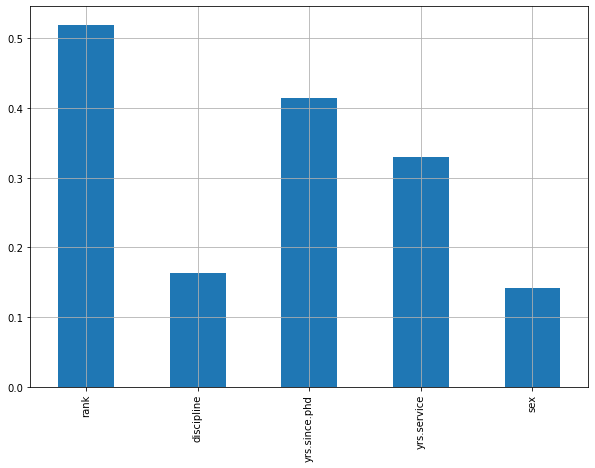

In [217]:
df.drop('salary',axis=1).corrwith(df.salary).plot(kind="bar",grid=True,figsize=(10,7))
plt.show()

In [218]:
df_new_z.skew()

rank            -1.266374
discipline      -0.161206
yrs.since.phd    0.228371
yrs.service      0.515222
sex              0.000000
salary           0.566401
dtype: float64

In [219]:
y=df_new_z["salary"]
x=df_new_z.drop(columns=["salary"])

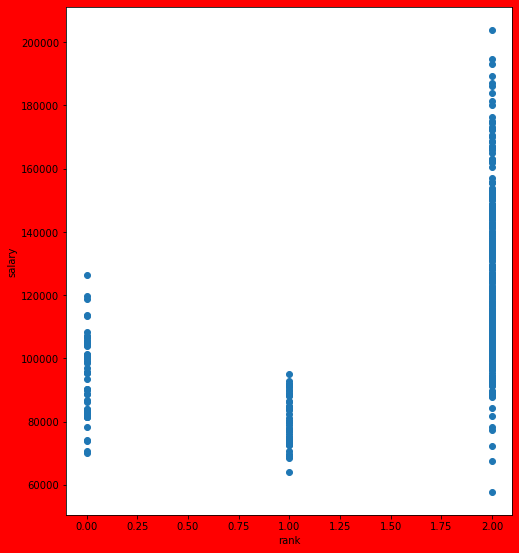

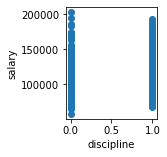

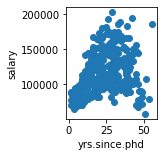

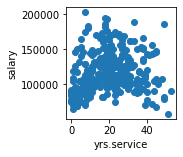

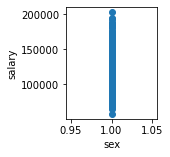

In [220]:
plt.figure(figsize=(20,15),facecolor="red")
plotnumber=1
for column in x:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
    plt.scatter(x[column],y)
    plt.xlabel(column,fontsize=10)
    plt.ylabel("salary",fontsize=10)
    plotnumber+=1
    plt.tight_layout()
    plt.show()

In [221]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScalerScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [250]:
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 0.61267166,  0.92295821, -0.30592878, -0.00647273,  0.        ],
       [ 0.61267166,  0.92295821, -0.22742799, -0.16271102,  0.        ],
       [-0.7275476 ,  0.92295821, -1.48344059, -1.17825989,  0.        ],
       ...,
       [ 0.61267166, -1.08347268,  1.49958932,  0.54036128,  0.        ],
       [ 0.61267166, -1.08347268,  0.16507594, -0.24083016,  0.        ],
       [-0.7275476 , -1.08347268, -1.16943744, -1.10014075,  0.        ]])

In [284]:
x=pd.DataFrame(data=x_scaled,columns=x.columns)

In [299]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=12)
y_train.head()

32     117256
264     99000
57      90215
99     106689
366    115435
Name: salary, dtype: int64

In [310]:
from sklearn import metrics

In [311]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [312]:
x_test.head()

,rank,discipline,yrs.since.phd,yrs.service,sex
67,-0.727548,0.922958,-1.561941,-1.334498,0.0
174,0.612672,0.922958,-0.462930,-0.084592,0.0
193,0.612672,0.922958,0.871583,0.149766,0.0
207,0.612672,-1.083473,0.636081,0.930957,0.0
169,-0.727548,0.922958,-1.483441,-1.100141,0.0


In [313]:
y_pred=ada.predict(x_train)

In [315]:
accuracy=metrics.r2_score(y_train,y_pred)
print('Rsquare score=',accuracy)

Rsquare score= 0.4971054448734228


In [321]:
y_test_pred=ada.predict(x_test) 

In [322]:
accuracy=metrics.r2_score(y_test,y_test_pred)
print('r2',accuracy)

r2 0.4427613509139853


In [454]:
import pickle
filename='salary project.pkl'
pickle.dump(accuracy,open(filename,'wb'))